### $$ IS-684 ~~ WEB ~~ MINING ~~ FINAL ~~ PROJECT $$


### $$ Metacritic~~ Games ~~ User ~~ Review ~~ Analysis $$

In [54]:
#Importing Required Libraries 
import pandas as pd
import requests
from requests import get
from bs4 import BeautifulSoup
import numpy as np
import re 
import time
from time import sleep
from random import randint
import selenium
from urllib.parse import urlparse
from urllib.parse import urljoin

#Importing Exception Handling librabries
from selenium.common.exceptions import NoSuchElementException

#Specifying the preferred language to server(US- English)
headers = {"Accept-Language": "en-US,en;q=0.5"}

In [ ]:
from selenium.webdriver import Firefox
##Initiating Selenium WebDriver
browser= Firefox()

In [116]:
from selenium import webdriver
#Initiating Headless Browser(PhantomJS)
driver= webdriver.PhantomJS()
driver.get(url)

In [80]:
#Initilize page size for traversing
page_size =1

#Initilize page range(1-10)
pages = np.arange(0, 10,page_size)

mainbody=[]
#Creating a for_loop to get all the td tags from all the 10 pages.
for page_no in pages: 

    page = requests.get('https://www.metacritic.com/browse/games/score/metascore/all/all/filtered?page=' + str(page_no), headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(page.text, 'html.parser')
    mainbody+=soup.find_all('td', {'class':'clamp-summary-wrap'})
    print("Page:", page_no/page_size+1)
    sleep(randint(2,10))

Page: 1.0
Page: 2.0
Page: 3.0
Page: 4.0
Page: 5.0
Page: 6.0
Page: 7.0
Page: 8.0
Page: 9.0
Page: 10.0


In [81]:
#Creating list for saving the output
g_names=[]
platforms=[]
r_dates=[]
summary=[]
g_links=[]
user_links=[]
meta_scores=[]

#Fetching all the required content using beautiful soup for all the 10 pages fetched above.
for g_info in mainbody:
    
        g_name=g_info.find('a', {'class':'title'}).text
        g_names.append(g_name)
        
        platform=g_info.find('div', {'class':'platform'}).find('span', {'class':'data'}).text.strip()
        platforms.append(platform)
        
        date=g_info.find_all('span')[3].text
        r_dates.append(date)
                  
        summ= g_info.find('div', {'class':'summary'}).text.strip()
        summary.append(summ)
        
        link= g_info.find_all('a',{'class':'title'})[0]['href']
        g_links.append(urljoin('https://www.metacritic.com',link))
        
        user_link= g_info.find_all('a', {'class':'metascore_anchor'})[2]['href']
        user_links.append(urljoin('https://www.metacritic.com',user_link))
        
        meta_score =g_info.find('a', {'class':'metascore_anchor'}).text.strip()
        meta_scores.append(meta_score)
        
        user_score=
        

#Passing the values to dataframe        
game_info= pd.DataFrame({
    
'Game_Name': g_names,
'Platform': platforms,
'Release_Date':r_dates,
'Game_Summary':summary,
'Meta_Score':meta_scores,
'Game Link':g_links,
'Review_Link':user_links,

})    

In [82]:
#Printing the length of data scraped from all the 10 pages.
print("Game_Name_Length","->", len(g_names))
print("Platform_Length","->",len(platforms))
print("Release_Date_Length","->",len(r_dates))
print("Summary_Length","->",len(summary))
print("Meta_Length","->",len(meta_scores))
print("Game_link_Length","->",len(g_links))
print("Review_link_Length","->",len(user_links))

Game_Name_Length -> 1000
Platform_Length -> 1000
Release_Date_Length -> 1000
Summary_Length -> 1000
Meta_Length -> 1000
Game_link_Length -> 1000
Review_link_Length -> 1000


In [175]:
#Printing the dataframe
game_info

Game_Name       Platform  \
0                 The Legend of Zelda: Ocarina of Time    Nintendo 64   
1                             Tony Hawk's Pro Skater 2    PlayStation   
2                                  Grand Theft Auto IV  PlayStation 3   
3                                          SoulCalibur      Dreamcast   
4                                  Grand Theft Auto IV       Xbox 360   
..                                                 ...            ...   
995                            Thief II: The Metal Age             PC   
996                Tactics Ogre: Let Us Cling Together            PSP   
997            Tom Clancy's Splinter Cell Chaos Theory  PlayStation 2   
998                     Diablo II: Lord of Destruction             PC   
999  Monkey Island 2 Special Edition: LeChuck's Rev...             PC   

           Release_Date                                       Game_Summary  \
0     November 23, 1998  As a young boy, Link is tricked by Ganondorf, ...   
1    September 20, 2000  As most major publishers' development efforts ...   
2        April 29, 2008  [Metacritic's 2008 PS3 Game of the Year; Also ...   
3     September 8, 1999  This is a tale of souls and swords, transcendi...   
4        April 29, 2008  [Metacritic's 2008 Xbox 360 Game of the Year; ...   
..                  ...                                                ...   
995      March 23, 2000  On the streets and rooftops of a darkened city...   
996   February 14, 2011  Warring clans struggle for supremacy over the ...   
997      March 28, 2005  The year is 2008. Information Warfare has evol...   
998       June 27, 2001  With a stash that's double the size of the "Di...   
999        July 7, 2010  More Pirates! More Adventure! More Monkeys! Re...   

    Meta_Score                                          Game Link  \
0           99  https://www.metacritic.com/game/nintendo-64/th...   
1           98  https://www.metacritic.com/game/playstation/to...   
2           98  https://www.metacritic.com/game/playstation-3/...   
3           98  https://www.metacritic.com/game/dreamcast/soul...   
4           98  https://www.metacritic.com/game/xbox-360/grand...   
..         ...                                                ...   
995         87  https://www.metacritic.com/game/pc/thief-ii-th...   
996         87  https://www.metacritic.com/game/psp/tactics-og...   
997         87  https://www.metacritic.com/game/playstation-2/...   
998         87  https://www.metacritic.com/game/pc/diablo-ii-l...   
999         87  https://www.metacritic.com/game/pc/monkey-isla...   

                                           Review_Link  
0    https://www.metacritic.com/game/nintendo-64/th...  
1    https://www.metacritic.com/game/playstation/to...  
2    https://www.metacritic.com/game/playstation-3/...  
3    https://www.metacritic.com/game/dreamcast/soul...  
4    https://www.metacritic.com/game/xbox-360/grand...  
..                                                 ...  
995  https://www.metacritic.com/game/pc/thief-ii-th...  
996  https://www.metacritic.com/game/psp/tactics-og...  
997  https://www.metacritic.com/game/playstation-2/...  
998  https://www.metacritic.com/game/pc/diablo-ii-l...  
999  https://www.metacritic.com/game/pc/monkey-isla...  

[1000 rows x 7 columns]

In [89]:
#creating list for saving the output
comp_names=[]
genres=[]
ratings=[]
no_players=[]

#Scraping additional game information from the game link using PhantomJS with Selenium.
count=0
for url in g_links:
    urls = "'"+url+"'"
    count=count+1
    print(count,"->", urls,'\n')
    driver.get(url)
    
    try:
        comp_name=driver.find_element_by_xpath("//span[@class='data']").text
        comp_names.append(comp_name)
    
    except NoSuchElementException:
        None
        
    time.sleep(.2)
    
    try:
        genre = driver.find_element_by_xpath("//li[@class='summary_detail product_genre']").text.split(':')[1]
        genres.append(genre)
    
    except NoSuchElementException:
        None
                                               
    time.sleep(.2)
    
    
    try:
        no_player=driver.find_element_by_xpath("//li[@class='summary_detail product_players']").text.split(':')[1]
        no_players.append(no_player)
        
    except NoSuchElementException:
        no_players.append('None')
    
    time.sleep(.2)
            
    try:
        rating = driver.find_element_by_xpath("//li[@class='summary_detail product_rating']").text.split(':')[1]
        ratings.append(rating)
        
    except NoSuchElementException:
        None
    
    time.sleep(.2)
    

1 -> 'https://www.metacritic.com/game/nintendo-64/the-legend-of-zelda-ocarina-of-time' 

2 -> 'https://www.metacritic.com/game/playstation/tony-hawks-pro-skater-2' 

3 -> 'https://www.metacritic.com/game/playstation-3/grand-theft-auto-iv' 

4 -> 'https://www.metacritic.com/game/dreamcast/soulcalibur' 

5 -> 'https://www.metacritic.com/game/xbox-360/grand-theft-auto-iv' 

6 -> 'https://www.metacritic.com/game/wii/super-mario-galaxy' 

7 -> 'https://www.metacritic.com/game/wii/super-mario-galaxy-2' 

8 -> 'https://www.metacritic.com/game/xbox-one/red-dead-redemption-2' 

9 -> 'https://www.metacritic.com/game/xbox-one/grand-theft-auto-v' 

10 -> 'https://www.metacritic.com/game/playstation-3/grand-theft-auto-v' 

11 -> 'https://www.metacritic.com/game/xbox-360/grand-theft-auto-v' 

12 -> 'https://www.metacritic.com/game/dreamcast/tony-hawks-pro-skater-2' 

13 -> 'https://www.metacritic.com/game/switch/the-legend-of-zelda-breath-of-the-wild' 

14 -> 'https://www.metacritic.com/game/playsta

114 -> 'https://www.metacritic.com/game/pc/company-of-heroes' 

115 -> 'https://www.metacritic.com/game/playstation/gran-turismo-2' 

116 -> 'https://www.metacritic.com/game/playstation-4/the-last-of-us-part-ii' 

117 -> 'https://www.metacritic.com/game/xbox/tom-clancys-splinter-cell-pandora-tomorrow' 

118 -> 'https://www.metacritic.com/game/ds/grand-theft-auto-chinatown-wars' 

119 -> 'https://www.metacritic.com/game/switch/divinity-original-sin-ii---definitive-edition' 

120 -> 'https://www.metacritic.com/game/xbox-360/pac-man-championship-edition-dx' 

121 -> 'https://www.metacritic.com/game/playstation/street-fighter-alpha-3' 

122 -> 'https://www.metacritic.com/game/xbox/tony-hawks-pro-skater-3' 

123 -> 'https://www.metacritic.com/game/switch/hades' 

124 -> 'https://www.metacritic.com/game/pc/half-life-alyx' 

125 -> 'https://www.metacritic.com/game/pc/divinity-original-sin-ii' 

126 -> 'https://www.metacritic.com/game/pc/unreal-tournament-2004' 

127 -> 'https://www.metacritic

229 -> 'https://www.metacritic.com/game/xbox/soulcalibur-ii' 

230 -> 'https://www.metacritic.com/game/playstation/tony-hawks-pro-skater' 

231 -> 'https://www.metacritic.com/game/pc/thief-the-dark-project' 

232 -> 'https://www.metacritic.com/game/3ds/fire-emblem-awakening' 

233 -> 'https://www.metacritic.com/game/pc/age-of-empires-ii-the-age-of-kings' 

234 -> 'https://www.metacritic.com/game/playstation-2/final-fantasy-x' 

235 -> 'https://www.metacritic.com/game/gamecube/prince-of-persia-the-sands-of-time' 

236 -> 'https://www.metacritic.com/game/playstation-5/demons-souls' 

237 -> 'https://www.metacritic.com/game/xbox-360/the-walking-dead-a-telltale-games-series' 

238 -> 'https://www.metacritic.com/game/pc/unreal-tournament-1999' 

239 -> 'https://www.metacritic.com/game/pc/sid-meiers-alpha-centauri' 

240 -> 'https://www.metacritic.com/game/nintendo-64/wave-race-64' 

241 -> 'https://www.metacritic.com/game/playstation-4/divinity-original-sin-ii---definitive-edition' 

242 ->

341 -> 'https://www.metacritic.com/game/pc/battlefield-2' 

342 -> 'https://www.metacritic.com/game/playstation-3/god-of-war-collection' 

343 -> 'https://www.metacritic.com/game/playstation-4/celeste' 

344 -> 'https://www.metacritic.com/game/playstation-2/madden-nfl-2005' 

345 -> 'https://www.metacritic.com/game/gamecube/tony-hawks-pro-skater-3' 

346 -> 'https://www.metacritic.com/game/pc/street-fighter-iv' 

347 -> 'https://www.metacritic.com/game/pc/fallout-3' 

348 -> 'https://www.metacritic.com/game/pc/batman-arkham-city' 

349 -> 'https://www.metacritic.com/game/pc/fez' 

350 -> 'https://www.metacritic.com/game/pc/planescape-torment' 

351 -> 'https://www.metacritic.com/game/xbox-360/gears-of-war-3' 

352 -> 'https://www.metacritic.com/game/playstation-3/killzone-2' 

353 -> 'https://www.metacritic.com/game/pc/neverwinter-nights' 

354 -> 'https://www.metacritic.com/game/playstation-3/batman-arkham-asylum' 

355 -> 'https://www.metacritic.com/game/game-boy-advance/castlevania-

456 -> 'https://www.metacritic.com/game/xbox-one/ori-and-the-will-of-the-wisps' 

457 -> 'https://www.metacritic.com/game/xbox/mvp-baseball-2004' 

458 -> 'https://www.metacritic.com/game/xbox/tony-hawks-pro-skater-4' 

459 -> 'https://www.metacritic.com/game/pc/sid-meiers-civilization-iii' 

460 -> 'https://www.metacritic.com/game/dreamcast/nfl-2k2' 

461 -> 'https://www.metacritic.com/game/playstation/wwf-smackdown!-2-know-your-role' 

462 -> 'https://www.metacritic.com/game/xbox-360/limbo' 

463 -> 'https://www.metacritic.com/game/switch/ori-and-the-blind-forest-definitive-edition' 

464 -> 'https://www.metacritic.com/game/xbox-360/mark-of-the-ninja' 

465 -> 'https://www.metacritic.com/game/pc/silent-hunter-iii' 

466 -> 'https://www.metacritic.com/game/pc/bayonetta' 

467 -> 'https://www.metacritic.com/game/playstation-3/assassins-creed-brotherhood' 

468 -> 'https://www.metacritic.com/game/wii/okami' 

469 -> 'https://www.metacritic.com/game/xbox-360/super-meat-boy' 

470 -> 'htt

571 -> 'https://www.metacritic.com/game/pc/worldwide-soccer-manager-2005' 

572 -> 'https://www.metacritic.com/game/pc/dead-cells' 

573 -> 'https://www.metacritic.com/game/pc/there-is-no-game-wrong-dimension' 

574 -> 'https://www.metacritic.com/game/wii-u/axiom-verge' 

575 -> 'https://www.metacritic.com/game/xbox-360/left-4-dead' 

576 -> 'https://www.metacritic.com/game/pc/left-4-dead' 

577 -> 'https://www.metacritic.com/game/pc/left-4-dead-2' 

578 -> 'https://www.metacritic.com/game/playstation-4/titanfall-2' 

579 -> 'https://www.metacritic.com/game/pc/f1-2017' 

580 -> 'https://www.metacritic.com/game/playstation-4/dark-souls-iii' 

581 -> 'https://www.metacritic.com/game/pc/devil-may-cry-5' 

582 -> 'https://www.metacritic.com/game/3ds/3d-gunstar-heroes' 

583 -> 'https://www.metacritic.com/game/xbox/jade-empire' 

584 -> 'https://www.metacritic.com/game/gamecube/tony-hawks-underground' 

585 -> 'https://www.metacritic.com/game/xbox/nhl-2k3' 

586 -> 'https://www.metacritic.c

689 -> 'https://www.metacritic.com/game/xbox-one/destiny-the-taken-king' 

690 -> 'https://www.metacritic.com/game/xbox-360/nba-2k11' 

691 -> 'https://www.metacritic.com/game/playstation-4/horizon-zero-dawn' 

692 -> 'https://www.metacritic.com/game/playstation-3/nba-2k11' 

693 -> 'https://www.metacritic.com/game/xbox-one/injustice-2' 

694 -> 'https://www.metacritic.com/game/playstation-4/minecraft-playstation-4-edition' 

695 -> 'https://www.metacritic.com/game/playstation-3/dark-souls' 

696 -> 'https://www.metacritic.com/game/pc/stardew-valley' 

697 -> 'https://www.metacritic.com/game/pc/prince-of-persia-the-sands-of-time' 

698 -> 'https://www.metacritic.com/game/pc/what-remains-of-edith-finch' 

699 -> 'https://www.metacritic.com/game/xbox/top-spin' 

700 -> 'https://www.metacritic.com/game/playstation-2/espn-nba-basketball' 

701 -> 'https://www.metacritic.com/game/xbox/tiger-woods-pga-tour-2004' 

702 -> 'https://www.metacritic.com/game/gamecube/tom-clancys-splinter-cell' 



803 -> 'https://www.metacritic.com/game/pc/cuphead' 

804 -> 'https://www.metacritic.com/game/playstation-4/divinity-original-sin-enhanced-edition' 

805 -> 'https://www.metacritic.com/game/xbox-one/minecraft-xbox-one-edition' 

806 -> 'https://www.metacritic.com/game/xbox-one/guacamelee!-super-turbo-championship-edition' 

807 -> 'https://www.metacritic.com/game/xbox-360/xcom-enemy-within' 

808 -> 'https://www.metacritic.com/game/playstation-2/ncaa-football-2005' 

809 -> 'https://www.metacritic.com/game/xbox/espn-nhl-hockey' 

810 -> 'https://www.metacritic.com/game/xbox/ncaa-football-2004' 

811 -> 'https://www.metacritic.com/game/xbox/fifa-soccer-2003' 

812 -> 'https://www.metacritic.com/game/playstation-2/ratchet-clank' 

813 -> 'https://www.metacritic.com/game/playstation-2/tiger-woods-pga-tour-2003' 

814 -> 'https://www.metacritic.com/game/gamecube/timesplitters-2' 

815 -> 'https://www.metacritic.com/game/xbox/jsrf-jet-set-radio-future' 

816 -> 'https://www.metacritic.com/g

918 -> 'https://www.metacritic.com/game/xbox-one/hellblade-senuas-sacrifice' 

919 -> 'https://www.metacritic.com/game/playstation-3/the-walking-dead-episode-5---no-time-left' 

920 -> 'https://www.metacritic.com/game/xbox-360/nba-2k13' 

921 -> 'https://www.metacritic.com/game/pc/the-witcher-2-assassins-of-kings' 

922 -> 'https://www.metacritic.com/game/gamecube/tiger-woods-pga-tour-2005' 

923 -> 'https://www.metacritic.com/game/xbox/ssx-tricky' 

924 -> 'https://www.metacritic.com/game/playstation/oddworld-abes-exoddus' 

925 -> 'https://www.metacritic.com/game/pc/plants-vs-zombies' 

926 -> 'https://www.metacritic.com/game/xbox-360/rocksmith-2014-edition' 

927 -> 'https://www.metacritic.com/game/playstation-3/burnout-paradise' 

928 -> 'https://www.metacritic.com/game/playstation-4/guacamelee!-super-turbo-championship-edition' 

929 -> 'https://www.metacritic.com/game/pc/doom-3' 

930 -> 'https://www.metacritic.com/game/pc/subnautica' 

931 -> 'https://www.metacritic.com/game/pla

In [90]:
#Printing the length of data scraped from all the 1000 games.

print("Developer_Length","->", len(comp_names))
print("Genre_Length","->",len(genres))
print("No._Player_Length","->",len(no_players))
print("Rating_Length","->",len(ratings))



Developer_Length -> 1000
Genre_Length -> 1000
No._Player_Length -> 1000
Rating_Length -> 1000


In [ ]:
#Games Information Dataframe
final_game_df= pd.DataFrame({
    
'Game_Name': g_names,
'Platform': platforms,
'Release_Date':r_dates,
'Game_Summary':summary,
'Meta_Score':meta_scores,  
'Developer': comp_names,
'Genre': genres,
'No._Players':no_players,
'Rating': ratings,
}) 

In [96]:
#Printing the dataframe
final_game_df

Game_Name       Platform  \
0                 The Legend of Zelda: Ocarina of Time    Nintendo 64   
1                             Tony Hawk's Pro Skater 2    PlayStation   
2                                  Grand Theft Auto IV  PlayStation 3   
3                                          SoulCalibur      Dreamcast   
4                                  Grand Theft Auto IV       Xbox 360   
..                                                 ...            ...   
995                            Thief II: The Metal Age             PC   
996                Tactics Ogre: Let Us Cling Together            PSP   
997            Tom Clancy's Splinter Cell Chaos Theory  PlayStation 2   
998                     Diablo II: Lord of Destruction             PC   
999  Monkey Island 2 Special Edition: LeChuck's Rev...             PC   

           Release_Date                                       Game_Summary  \
0     November 23, 1998  As a young boy, Link is tricked by Ganondorf, ...   
1    September 20, 2000  As most major publishers' development efforts ...   
2        April 29, 2008  [Metacritic's 2008 PS3 Game of the Year; Also ...   
3     September 8, 1999  This is a tale of souls and swords, transcendi...   
4        April 29, 2008  [Metacritic's 2008 Xbox 360 Game of the Year; ...   
..                  ...                                                ...   
995      March 23, 2000  On the streets and rooftops of a darkened city...   
996   February 14, 2011  Warring clans struggle for supremacy over the ...   
997      March 28, 2005  The year is 2008. Information Warfare has evol...   
998       June 27, 2001  With a stash that's double the size of the "Di...   
999        July 7, 2010  More Pirates! More Adventure! More Monkeys! Re...   

    Meta_Score               Developer  \
0           99                Nintendo   
1           98              Activision   
2           98          Rockstar Games   
3           98                   Namco   
4           98          Rockstar Games   
..         ...                     ...   
995         87       Eidos Interactive   
996         87             Square Enix   
997         87                 Ubisoft   
998         87  Blizzard Entertainment   
999         87               LucasArts   

                                                Genre             No._Players  \
0                           Action Adventure, Fantasy                1 Player   
1                  Sports, Alternative, Skateboarding                     1-2   
2        Action Adventure, Modern, Modern, Open-World                1 Player   
3                                Action, Fighting, 3D                     1-2   
4        Action Adventure, Modern, Modern, Open-World                1 Player   
..                                                ...                     ...   
995       Action Adventure, Fantasy, General, Fantasy                           
996   Strategy, Turn-Based, Fantasy, Fantasy, Tactics   No Online Multiplayer   
997                          Action Adventure, Modern                4 Online   
998              Role-Playing, Action RPG, Action RPG                     1-8   
999      Adventure, General, General, Point-and-Click   No Online Multiplayer   

    Rating  
0        E  
1        T  
2        M  
3        T  
4        M  
..     ...  
995      M  
996      T  
997      M  
998      M  
999   E10+  

[1000 rows x 9 columns]

#WE HAVE SCRAPED TOP 1000 GAME DETAILS

In [98]:
#Saving the Game Information dataframe to CSV.
final_game_df.to_csv("game_data.csv")

In [ ]:
#Creating a Dataframe for Game Reviews
links_df= pd.DataFrame({
    
'Game_Name': g_names,
'Platform': platforms,
'Game Link':g_links,
    
}) 

In [150]:
#print(comp_names.pop(200))
links_df

Game_Name       Platform  \
0                 The Legend of Zelda: Ocarina of Time    Nintendo 64   
1                             Tony Hawk's Pro Skater 2    PlayStation   
2                                  Grand Theft Auto IV  PlayStation 3   
3                                          SoulCalibur      Dreamcast   
4                                  Grand Theft Auto IV       Xbox 360   
..                                                 ...            ...   
995                            Thief II: The Metal Age             PC   
996                Tactics Ogre: Let Us Cling Together            PSP   
997            Tom Clancy's Splinter Cell Chaos Theory  PlayStation 2   
998                     Diablo II: Lord of Destruction             PC   
999  Monkey Island 2 Special Edition: LeChuck's Rev...             PC   

                                           Review_Link  
0    https://www.metacritic.com/game/nintendo-64/th...  
1    https://www.metacritic.com/game/playstation/to...  
2    https://www.metacritic.com/game/playstation-3/...  
3    https://www.metacritic.com/game/dreamcast/soul...  
4    https://www.metacritic.com/game/xbox-360/grand...  
..                                                 ...  
995  https://www.metacritic.com/game/pc/thief-ii-th...  
996  https://www.metacritic.com/game/psp/tactics-og...  
997  https://www.metacritic.com/game/playstation-2/...  
998  https://www.metacritic.com/game/pc/diablo-ii-l...  
999  https://www.metacritic.com/game/pc/monkey-isla...  

[1000 rows x 3 columns]

In [151]:
#creating list for saving the output
u_reviews=[]
u_gamename=[]
u_platform=[]
u_reviewdates=[]
u_ratings=[]

#Scraping the user reviews from the review link using Beautiful Soup 
count = 0
#print(row['Game Name'], row['Review Link'])
for index, row in links_df.iterrows():
    game_name = row['Game_Name']
    userreviewlinks = row['Review_Link']
    platform = row['Platform']
    count =count + 1
    print(count,'-->',userreviewlinks,'\n')
    #Specifying the review page range to 2
    for i in range(0,2):
        try:
            url3 = userreviewlinks+('?page=')+str(i)
            user_agent = {'User-agent': 'Mozilla/5.0'}
            response  = requests.get(url3, headers = user_agent)
            time.sleep(1) 
            soup = BeautifulSoup(response.text, 'html.parser')
            soup1=soup.find('div', {'class': 'user_reviews_module'})
            body = soup1.find_all('div', {'class':'review_content'})
            for r_tag in body:
                review = r_tag.find('div', {'class':'review_body'}).text.strip()
                u_reviews.append(review)
                user_rating = r_tag.find('div', {'class':'review_grade'}).find_all('div')[0].text
                u_ratings.append(user_rating)
                review_date =r_tag.find('div', {'class': 'date'}).text
                u_reviewdates.append(review_date)
                u_gamename.append(game_name)
                u_platform.append(platform)
        except:
            u_reviews.append('None')
            u_ratings.append('None')
            u_reviewdates.append('None')
            u_gamename.append('None')
            u_platform.append('None')            

1 --> https://www.metacritic.com/game/nintendo-64/the-legend-of-zelda-ocarina-of-time/user-reviews 

2 --> https://www.metacritic.com/game/playstation/tony-hawks-pro-skater-2/user-reviews 

3 --> https://www.metacritic.com/game/playstation-3/grand-theft-auto-iv/user-reviews 

4 --> https://www.metacritic.com/game/dreamcast/soulcalibur/user-reviews 

5 --> https://www.metacritic.com/game/xbox-360/grand-theft-auto-iv/user-reviews 

6 --> https://www.metacritic.com/game/wii/super-mario-galaxy/user-reviews 

7 --> https://www.metacritic.com/game/wii/super-mario-galaxy-2/user-reviews 

8 --> https://www.metacritic.com/game/xbox-one/red-dead-redemption-2/user-reviews 

9 --> https://www.metacritic.com/game/xbox-one/grand-theft-auto-v/user-reviews 

10 --> https://www.metacritic.com/game/playstation-3/grand-theft-auto-v/user-reviews 

11 --> https://www.metacritic.com/game/xbox-360/grand-theft-auto-v/user-reviews 

12 --> https://www.metacritic.com/game/dreamcast/tony-hawks-pro-skater-2/user-

Exception ignored in: <function Service.__del__ at 0x000001C65C589EE8>
Traceback (most recent call last):
  File "C:\Users\prash\Anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 175, in __del__
    try:
KeyboardInterrupt: 


18 --> https://www.metacritic.com/game/gamecube/metroid-prime/user-reviews 

19 --> https://www.metacritic.com/game/playstation-2/grand-theft-auto-iii/user-reviews 

20 --> https://www.metacritic.com/game/switch/super-mario-odyssey/user-reviews 

21 --> https://www.metacritic.com/game/xbox/halo-combat-evolved/user-reviews 

22 --> https://www.metacritic.com/game/dreamcast/nfl-2k1/user-reviews 

23 --> https://www.metacritic.com/game/pc/half-life-2/user-reviews 

24 --> https://www.metacritic.com/game/pc/grand-theft-auto-v/user-reviews 

25 --> https://www.metacritic.com/game/wii-u/the-legend-of-zelda-breath-of-the-wild/user-reviews 

26 --> https://www.metacritic.com/game/xbox-360/bioshock/user-reviews 

27 --> https://www.metacritic.com/game/nintendo-64/goldeneye-007/user-reviews 

28 --> https://www.metacritic.com/game/playstation-3/uncharted-2-among-thieves/user-reviews 

29 --> https://www.metacritic.com/game/gamecube/resident-evil-4/user-reviews 

30 --> https://www.metacritic.com

From cffi callback <function _verify_callback at 0x000001C63CEF6708>:
Traceback (most recent call last):
  File "C:\Users\prash\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 306, in wrapper
    @wraps(callback)
KeyboardInterrupt


35 --> https://www.metacritic.com/game/gamecube/the-legend-of-zelda-twilight-princess/user-reviews 

36 --> https://www.metacritic.com/game/xbox-360/the-elder-scrolls-v-skyrim/user-reviews 



From cffi callback <function _verify_callback at 0x000001C63CEF6798>:
Traceback (most recent call last):
  File "C:\Users\prash\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 306, in wrapper
    @wraps(callback)
KeyboardInterrupt


37 --> https://www.metacritic.com/game/pc/half-life/user-reviews 

38 --> https://www.metacritic.com/game/playstation-2/resident-evil-4/user-reviews 

39 --> https://www.metacritic.com/game/gamecube/the-legend-of-zelda-the-wind-waker/user-reviews 

40 --> https://www.metacritic.com/game/playstation/gran-turismo/user-reviews 

41 --> https://www.metacritic.com/game/pc/bioshock/user-reviews 

42 --> https://www.metacritic.com/game/playstation-2/metal-gear-solid-2-sons-of-liberty/user-reviews 

43 --> https://www.metacritic.com/game/xbox/grand-theft-auto-double-pack/user-reviews 

44 --> https://www.metacritic.com/game/pc/baldurs-gate-ii-shadows-of-amn/user-reviews 

45 --> https://www.metacritic.com/game/playstation-2/grand-theft-auto-san-andreas/user-reviews 

46 --> https://www.metacritic.com/game/playstation-2/grand-theft-auto-vice-city/user-reviews 

47 --> https://www.metacritic.com/game/playstation-3/littlebigplanet/user-reviews 

48 --> https://www.metacritic.com/game/gamecube/the

134 --> https://www.metacritic.com/game/xbox-360/street-fighter-iv/user-reviews 

135 --> https://www.metacritic.com/game/pc/minecraft/user-reviews 

136 --> https://www.metacritic.com/game/switch/undertale/user-reviews 

137 --> https://www.metacritic.com/game/playstation-vita/persona-4-golden/user-reviews 

138 --> https://www.metacritic.com/game/playstation-4/persona-5/user-reviews 

139 --> https://www.metacritic.com/game/pc/red-dead-redemption-2/user-reviews 

140 --> https://www.metacritic.com/game/playstation-2/ssx-3/user-reviews 

141 --> https://www.metacritic.com/game/xbox/tom-clancys-splinter-cell/user-reviews 

142 --> https://www.metacritic.com/game/pc/grand-theft-auto-iii/user-reviews 

143 --> https://www.metacritic.com/game/dreamcast/quake-iii-arena/user-reviews 

144 --> https://www.metacritic.com/game/pc/homeworld/user-reviews 

145 --> https://www.metacritic.com/game/playstation-2/okami/user-reviews 

146 --> https://www.metacritic.com/game/playstation-3/the-elder-sc

233 --> https://www.metacritic.com/game/pc/age-of-empires-ii-the-age-of-kings/user-reviews 

234 --> https://www.metacritic.com/game/playstation-2/final-fantasy-x/user-reviews 

235 --> https://www.metacritic.com/game/gamecube/prince-of-persia-the-sands-of-time/user-reviews 

236 --> https://www.metacritic.com/game/playstation-5/demons-souls/user-reviews 

237 --> https://www.metacritic.com/game/xbox-360/the-walking-dead-a-telltale-games-series/user-reviews 

238 --> https://www.metacritic.com/game/pc/unreal-tournament-1999/user-reviews 

239 --> https://www.metacritic.com/game/pc/sid-meiers-alpha-centauri/user-reviews 

240 --> https://www.metacritic.com/game/nintendo-64/wave-race-64/user-reviews 

241 --> https://www.metacritic.com/game/playstation-4/divinity-original-sin-ii---definitive-edition/user-reviews 

242 --> https://www.metacritic.com/game/pc/galactic-civilizations-ii-twilight-of-the-arnor/user-reviews 

243 --> https://www.metacritic.com/game/wii-u/super-smash-bros-for-wii

329 --> https://www.metacritic.com/game/gamecube/ncaa-football-2003/user-reviews 

330 --> https://www.metacritic.com/game/pc/the-longest-journey/user-reviews 

331 --> https://www.metacritic.com/game/pc/tony-hawks-pro-skater-2/user-reviews 

332 --> https://www.metacritic.com/game/pc/star-wars-jedi-knight-dark-forces-ii/user-reviews 

333 --> https://www.metacritic.com/game/pc/batman-arkham-asylum/user-reviews 

334 --> https://www.metacritic.com/game/xbox-360/halo-reach/user-reviews 

335 --> https://www.metacritic.com/game/pc/galactic-civilizations-ii-dark-avatar/user-reviews 

336 --> https://www.metacritic.com/game/xbox-360/mass-effect/user-reviews 

337 --> https://www.metacritic.com/game/pc/the-operative-no-one-lives-forever/user-reviews 

338 --> https://www.metacritic.com/game/pc/crusader-kings-iii/user-reviews 

339 --> https://www.metacritic.com/game/xbox-360/forza-motorsport-4/user-reviews 

340 --> https://www.metacritic.com/game/playstation/resident-evil/user-reviews 

34

428 --> https://www.metacritic.com/game/playstation-4/rayman-legends/user-reviews 

429 --> https://www.metacritic.com/game/playstation-3/mlb-11-the-show/user-reviews 

430 --> https://www.metacritic.com/game/xbox-one/nier-automata---become-as-gods-edition/user-reviews 

431 --> https://www.metacritic.com/game/playstation-2/jak-and-daxter-the-precursor-legacy/user-reviews 

432 --> https://www.metacritic.com/game/gamecube/star-wars-rogue-leader-rogue-squadron-ii/user-reviews 

433 --> https://www.metacritic.com/game/xbox-one/yakuza-like-a-dragon/user-reviews 

434 --> https://www.metacritic.com/game/switch/bastion/user-reviews 

435 --> https://www.metacritic.com/game/xbox-one/monster-hunter-world/user-reviews 

436 --> https://www.metacritic.com/game/pc/stephens-sausage-roll/user-reviews 

437 --> https://www.metacritic.com/game/playstation-vita/velocity-2x/user-reviews 

438 --> https://www.metacritic.com/game/playstation-2/burnout-revenge/user-reviews 

439 --> https://www.metacriti

527 --> https://www.metacritic.com/game/pc/star-wars-jedi-knight-ii-jedi-outcast/user-reviews 

528 --> https://www.metacritic.com/game/playstation-3/wipeout-hd-fury/user-reviews 

529 --> https://www.metacritic.com/game/xbox/halo-2-multiplayer-map-pack/user-reviews 

530 --> https://www.metacritic.com/game/pc/resident-evil-2/user-reviews 

531 --> https://www.metacritic.com/game/xbox-360/borderlands-2/user-reviews 

532 --> https://www.metacritic.com/game/psp/shin-megami-tensei-persona-3-portable/user-reviews 

533 --> https://www.metacritic.com/game/playstation-3/xcom-enemy-unknown/user-reviews 

534 --> https://www.metacritic.com/game/switch/xenoblade-chronicles-definitive-edition/user-reviews 

535 --> https://www.metacritic.com/game/xbox-360/call-of-duty-2/user-reviews 

536 --> https://www.metacritic.com/game/xbox/burnout-revenge/user-reviews 

537 --> https://www.metacritic.com/game/playstation-2/dragon-quest-viii-journey-of-the-cursed-king/user-reviews 

538 --> https://www.met

627 --> https://www.metacritic.com/game/playstation-3/deus-ex-human-revolution/user-reviews 

628 --> https://www.metacritic.com/game/xbox-one/stardew-valley/user-reviews 

629 --> https://www.metacritic.com/game/ds/castlevania-dawn-of-sorrow/user-reviews 

630 --> https://www.metacritic.com/game/xbox/nba-street-vol-2/user-reviews 

631 --> https://www.metacritic.com/game/dreamcast/sonic-adventure-2/user-reviews 

632 --> https://www.metacritic.com/game/pc/nascar-racing-4/user-reviews 

633 --> https://www.metacritic.com/game/pc/duke-nukem-3d/user-reviews 

634 --> https://www.metacritic.com/game/playstation-3/la-noire/user-reviews 

635 --> https://www.metacritic.com/game/switch/okami-hd/user-reviews 

636 --> https://www.metacritic.com/game/playstation-4/bastion/user-reviews 

637 --> https://www.metacritic.com/game/pc/far-cry/user-reviews 

638 --> https://www.metacritic.com/game/pc/nuclear-throne/user-reviews 

639 --> https://www.metacritic.com/game/xbox-360/dead-space/user-review

728 --> https://www.metacritic.com/game/xbox/brothers-in-arms-road-to-hill-30/user-reviews 

729 --> https://www.metacritic.com/game/pc/sekiro-shadows-die-twice/user-reviews 

730 --> https://www.metacritic.com/game/wii-u/deus-ex-human-revolution---directors-cut/user-reviews 

731 --> https://www.metacritic.com/game/playstation-2/madden-nfl-06/user-reviews 

732 --> https://www.metacritic.com/game/xbox-360/dishonored/user-reviews 

733 --> https://www.metacritic.com/game/pc/limbo/user-reviews 

734 --> https://www.metacritic.com/game/pc/crusader-kings-ii-the-old-gods/user-reviews 

735 --> https://www.metacritic.com/game/pc/assassins-creed-brotherhood/user-reviews 

736 --> https://www.metacritic.com/game/playstation/crash-team-racing/user-reviews 

737 --> https://www.metacritic.com/game/wii/dj-hero-2/user-reviews 

738 --> https://www.metacritic.com/game/xbox-360/pinball-fx-2-marvel-pinball---avengers-chronicles/user-reviews 

739 --> https://www.metacritic.com/game/playstation-2/med

825 --> https://www.metacritic.com/game/game-boy-advance/warioware-twisted!/user-reviews 

826 --> https://www.metacritic.com/game/pc/halo-the-master-chief-collection---halo-3/user-reviews 

827 --> https://www.metacritic.com/game/3ds/pokemon-y/user-reviews 

828 --> https://www.metacritic.com/game/playstation-3/call-of-duty-black-ops/user-reviews 

829 --> https://www.metacritic.com/game/pc/return-to-castle-wolfenstein/user-reviews 

830 --> https://www.metacritic.com/game/xbox-one/ori-and-the-blind-forest/user-reviews 

831 --> https://www.metacritic.com/game/pc/ori-and-the-blind-forest-definitive-edition/user-reviews 

832 --> https://www.metacritic.com/game/xbox/ncaa-football-07/user-reviews 

833 --> https://www.metacritic.com/game/gamecube/nba-street/user-reviews 

834 --> https://www.metacritic.com/game/playstation/madden-nfl-2002/user-reviews 

835 --> https://www.metacritic.com/game/pc/shogo-mobile-armor-division/user-reviews 

836 --> https://www.metacritic.com/game/pc/thirty

924 --> https://www.metacritic.com/game/playstation/oddworld-abes-exoddus/user-reviews 

925 --> https://www.metacritic.com/game/pc/plants-vs-zombies/user-reviews 

926 --> https://www.metacritic.com/game/xbox-360/rocksmith-2014-edition/user-reviews 

927 --> https://www.metacritic.com/game/playstation-3/burnout-paradise/user-reviews 

928 --> https://www.metacritic.com/game/playstation-4/guacamelee!-super-turbo-championship-edition/user-reviews 

929 --> https://www.metacritic.com/game/pc/doom-3/user-reviews 

930 --> https://www.metacritic.com/game/pc/subnautica/user-reviews 

931 --> https://www.metacritic.com/game/playstation-4/frostpunk-console-edition/user-reviews 

932 --> https://www.metacritic.com/game/playstation-3/grid/user-reviews 

933 --> https://www.metacritic.com/game/switch/stardew-valley/user-reviews 

934 --> https://www.metacritic.com/game/xbox-one/devil-may-cry-5/user-reviews 

935 --> https://www.metacritic.com/game/pc/super-meat-boy/user-reviews 

936 --> https:/

In [176]:
#Priting the reviews length for the 1000 games
print("Review_Length","->", len(u_reviews))
print("User_Rating__Length","->",len(u_ratings))
print("User_Date_Length","->",len(u_reviewdates))
print("Game_Name_Length","->",len(u_gamename))
print("Game_Platform_Length","->",len(u_platform))

Review_Length -> 84078
User_Rating__Length -> 84078
User_Date_Length -> 84078
Game_Name_Length -> 84078
Game_Platform_Length -> 84078


In [154]:
#Creating the dataframe for user reviews
user_final= pd.DataFrame({
    
'Game_Name': u_gamename,
'Platform': u_platform,
'Review_Date':u_reviewdates,
'User_Review':u_reviews,
'User_Rating':u_ratings,  
}) 

In [155]:
#Printing the user reviews dataframe
user_final

Game_Name     Platform  \
0                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
1                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
2                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
3                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
4                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
...                                                  ...          ...   
84073  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
84074  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
84075  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
84076  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
84077  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   

        Review_Date                                        User_Review  \
0      Apr 25, 2011  I won't bore you with what everyone is already...   
1      Jun  9, 2011  I'm one of those people who think that this is...   
2      Nov 25, 2010  Anyone who gives the masterpiece below a 7 or ...   
3      Jun 12, 2011  Everything in OoT is so near at perfection, it...   
4      Mar 21, 2010  This game is the highest rated game on Metacri...   
...             ...                                                ...   
84073  Jun  2, 2019  I am one of the players who never played the o...   
84074  Mar 18, 2017  If I had played this game 25 years ago, I'm su...   
84075  Oct 18, 2019  This game is pretty fun. Good times were had b...   
84076  Sep  6, 2020  Вторая часть оказалось чуть лучше первой, а им...   
84077  May  1, 2020  And here is the best point and click graphic a...   

      User_Rating  
0              10  
1              10  
2              10  
3              10  
4              10  
...           ...  
84073           9  
84074           7  
84075           8  
84076           4  
84077           9  

[84078 rows x 5 columns]

In [ ]:
#Cleaning the columns with "None" values
user_rev_final= user_final.mask(user_final.eq('None')).dropna()

In [177]:
#Print total review after cleaning
print("Total Reviews","->",len(user_rev_final))

Total Reviews -> 83991


#WE HAVE SCARPED 83991 REVIEWS FROM THE TOP 1000 GAMES!!

In [166]:
#Converting User_Rating to Numeric
user_rev_final["User_Rating"] = pd.to_numeric(user_rev_final["User_Rating"])

In [167]:
user_rev_final

Game_Name     Platform  \
0                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
1                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
2                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
3                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
4                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
...                                                  ...          ...   
84073  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
84074  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
84075  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
84076  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
84077  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   

        Review_Date                                        User_Review  \
0      Apr 25, 2011  I won't bore you with what everyone is already...   
1      Jun  9, 2011  I'm one of those people who think that this is...   
2      Nov 25, 2010  Anyone who gives the masterpiece below a 7 or ...   
3      Jun 12, 2011  Everything in OoT is so near at perfection, it...   
4      Mar 21, 2010  This game is the highest rated game on Metacri...   
...             ...                                                ...   
84073  Jun  2, 2019  I am one of the players who never played the o...   
84074  Mar 18, 2017  If I had played this game 25 years ago, I'm su...   
84075  Oct 18, 2019  This game is pretty fun. Good times were had b...   
84076  Sep  6, 2020  Вторая часть оказалось чуть лучше первой, а им...   
84077  May  1, 2020  And here is the best point and click graphic a...   

       User_Rating  
0               10  
1               10  
2               10  
3               10  
4               10  
...            ...  
84073            9  
84074            7  
84075            8  
84076            4  
84077            9  

[83991 rows x 5 columns]

In [178]:
#Saving the User Reviews dataframe to CSV.
user_rev_final.to_csv("user_reviews_final_df.csv")

In [170]:
#Calculating the mean of user rating for the 1000 games!
single_review=user_rev_final.groupby(['Game_Name','Platform']).mean()

In [252]:
#Printing the average user rating  for 1000 games.
single_review

User_Rating
Game_Name                             Platform                     
3D Gunstar Heroes                     3DS                  9.000000
3D Streets of Rage II                 3DS                 10.000000
A Short Hike                          Switch               8.925926
Ace Combat 04: Shattered Skies        PlayStation 2        9.454545
Advance Wars                          Game Boy Advance     9.193548
...                                                             ...
Yakuza 0                              Xbox One             7.600000
Yakuza: Like a Dragon                 Xbox One             9.833333
Yoshi's Island: Super Mario Advance 3 Game Boy Advance     9.585366
Zero Escape: Virtue's Last Reward     3DS                  8.314815
flower                                PlayStation 4        6.387755

[968 rows x 1 columns]

In [254]:
#Combining the average user rating with the game detail dataframe using inner join.
merged_df = final_game_df.merge(single_review, how='inner', left_on=["Game_Name", "Platform"], right_on=["Game_Name","Platform"])

In [255]:
#Printing the combined dataframe
merged_df

Game_Name       Platform  \
0                 The Legend of Zelda: Ocarina of Time    Nintendo 64   
1                             Tony Hawk's Pro Skater 2    PlayStation   
2                                  Grand Theft Auto IV  PlayStation 3   
3                                          SoulCalibur      Dreamcast   
4                                  Grand Theft Auto IV       Xbox 360   
..                                                 ...            ...   
963                            Thief II: The Metal Age             PC   
964                Tactics Ogre: Let Us Cling Together            PSP   
965            Tom Clancy's Splinter Cell Chaos Theory  PlayStation 2   
966                     Diablo II: Lord of Destruction             PC   
967  Monkey Island 2 Special Edition: LeChuck's Rev...             PC   

           Release_Date                                       Game_Summary  \
0     November 23, 1998  As a young boy, Link is tricked by Ganondorf, ...   
1    September 20, 2000  As most major publishers' development efforts ...   
2        April 29, 2008  [Metacritic's 2008 PS3 Game of the Year; Also ...   
3     September 8, 1999  This is a tale of souls and swords, transcendi...   
4        April 29, 2008  [Metacritic's 2008 Xbox 360 Game of the Year; ...   
..                  ...                                                ...   
963      March 23, 2000  On the streets and rooftops of a darkened city...   
964   February 14, 2011  Warring clans struggle for supremacy over the ...   
965      March 28, 2005  The year is 2008. Information Warfare has evol...   
966       June 27, 2001  With a stash that's double the size of the "Di...   
967        July 7, 2010  More Pirates! More Adventure! More Monkeys! Re...   

    Meta_Score               Developer  \
0           99                Nintendo   
1           98              Activision   
2           98          Rockstar Games   
3           98                   Namco   
4           98          Rockstar Games   
..         ...                     ...   
963         87       Eidos Interactive   
964         87             Square Enix   
965         87                 Ubisoft   
966         87  Blizzard Entertainment   
967         87               LucasArts   

                                                Genre             No._Players  \
0                           Action Adventure, Fantasy                1 Player   
1                  Sports, Alternative, Skateboarding                     1-2   
2        Action Adventure, Modern, Modern, Open-World                1 Player   
3                                Action, Fighting, 3D                     1-2   
4        Action Adventure, Modern, Modern, Open-World                1 Player   
..                                                ...                     ...   
963       Action Adventure, Fantasy, General, Fantasy                           
964   Strategy, Turn-Based, Fantasy, Fantasy, Tactics   No Online Multiplayer   
965                          Action Adventure, Modern                4 Online   
966              Role-Playing, Action RPG, Action RPG                     1-8   
967      Adventure, General, General, Point-and-Click   No Online Multiplayer   

    Rating  User_Rating  
0        E     9.905000  
1        T     7.743590  
2        M     6.610000  
3        T     9.315789  
4        M     6.990000  
..     ...          ...  
963      M     8.636364  
964      T     8.083333  
965      M     8.111111  
966      M     9.466019  
967   E10+     7.909091  

[968 rows x 10 columns]

In [256]:
#Saving the combined dataframe to CSV
merged_df.to_csv("merged_df1.csv")

#### $$SENTIMENT ~~ ANALYSIS$$

In [2]:
#Function to clean the user reviews
import pandas as pd
import re
import nltk
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

def clean(text):
    #Remove punctuation by removing non-space  and alpha-numeric characters
    text=re.sub(r'[^\w\s]',' ',str(text)).lower()
    #Split by remaining non-alphanumeric characters
    words=re.split(r'\W+', text)                   
    #Remove stopwords
    non_stop_words=[word for word in words if word not in stopword]  
    #Lemmatize the words
    lem_words= [wn.lemmatize(word) for word in non_stop_words]             
    clean_text= ' '.join(lem_words)
    return clean_text

In [3]:
#Reading the User Review CSV
reviews_df=pd.read_csv('user_reviews_final_df.csv')

In [4]:
#Converting the reviews to string
reviews_df['User_Review']=reviews_df['User_Review'].apply(str)

In [6]:
#Applying the clean fucntion to the user review column
reviews_df['Clean_review']=reviews_df['User_Review'].apply(clean)

In [7]:
#Printing the clean user review dataframe
reviews_df

Unnamed: 0                                          Game_Name  \
0               0               The Legend of Zelda: Ocarina of Time   
1               1               The Legend of Zelda: Ocarina of Time   
2               2               The Legend of Zelda: Ocarina of Time   
3               3               The Legend of Zelda: Ocarina of Time   
4               4               The Legend of Zelda: Ocarina of Time   
...           ...                                                ...   
83986       83986  Monkey Island 2 Special Edition: LeChuck's Rev...   
83987       83987  Monkey Island 2 Special Edition: LeChuck's Rev...   
83988       83988  Monkey Island 2 Special Edition: LeChuck's Rev...   
83989       83989  Monkey Island 2 Special Edition: LeChuck's Rev...   
83990       83990  Monkey Island 2 Special Edition: LeChuck's Rev...   

          Platform Review_Date  \
0      Nintendo 64   25-Apr-11   
1      Nintendo 64    9-Jun-11   
2      Nintendo 64   25-Nov-10   
3      Nintendo 64   12-Jun-11   
4      Nintendo 64   21-Mar-10   
...            ...         ...   
83986           PC    2-Jun-19   
83987           PC   18-Mar-17   
83988           PC   18-Oct-19   
83989           PC    6-Sep-20   
83990           PC    1-May-20   

                                             User_Review  User_Rating  \
0      I won't bore you with what everyone is already...           10   
1      I'm one of those people who think that this is...           10   
2      Anyone who gives the masterpiece below a 7 or ...           10   
3      Everything in OoT is so near at perfection, it...           10   
4      This game is the highest rated game on Metacri...           10   
...                                                  ...          ...   
83986  I am one of the players who never played the o...            9   
83987  If I had played this game 25 years ago, I'm su...            7   
83988  This game is pretty fun. Good times were had b...            8   
83989  Вторая часть оказалось чуть лучше первой, а им...            4   
83990  And here is the best point and click graphic a...            9   

                                            Clean_review  
0      bore everyone already saying amazing game fenc...  
1      one people think greatest game time matter qua...  
2      anyone give masterpiece 7 8 either hate astoun...  
3      everything oot near perfection really wonder g...  
4      game highest rated game metacritic good reason...  
...                                                  ...  
83986  one player never played original started adven...  
83987  played game 25 year ago sure would enjoyed rem...  
83988  game pretty fun good time best monkey time fun...  
83989  вторая часть оказалось чуть лучше первой а име...  
83990  best point click graphic adventure ever played...  

[83991 rows x 7 columns]

#### 1) Sentiment Analysis Using Rule Based System

In [8]:
#!pip install textblob
from textblob import TextBlob 

In [9]:
#Defining the fucntion for calculting sentiment using textblob.
def get_sentiment(text):
    blob=TextBlob(text)
    return blob.sentiment

In [11]:
#Applying the clean_review function to calculate sentiment
reviews_df['Sentiment']=reviews_df['Clean_review'].apply(get_sentiment)

In [12]:
#Printing the dataframe with newly calculated sentiment
reviews_df

Unnamed: 0                                          Game_Name  \
0               0               The Legend of Zelda: Ocarina of Time   
1               1               The Legend of Zelda: Ocarina of Time   
2               2               The Legend of Zelda: Ocarina of Time   
3               3               The Legend of Zelda: Ocarina of Time   
4               4               The Legend of Zelda: Ocarina of Time   
...           ...                                                ...   
83986       83986  Monkey Island 2 Special Edition: LeChuck's Rev...   
83987       83987  Monkey Island 2 Special Edition: LeChuck's Rev...   
83988       83988  Monkey Island 2 Special Edition: LeChuck's Rev...   
83989       83989  Monkey Island 2 Special Edition: LeChuck's Rev...   
83990       83990  Monkey Island 2 Special Edition: LeChuck's Rev...   

          Platform Review_Date  \
0      Nintendo 64   25-Apr-11   
1      Nintendo 64    9-Jun-11   
2      Nintendo 64   25-Nov-10   
3      Nintendo 64   12-Jun-11   
4      Nintendo 64   21-Mar-10   
...            ...         ...   
83986           PC    2-Jun-19   
83987           PC   18-Mar-17   
83988           PC   18-Oct-19   
83989           PC    6-Sep-20   
83990           PC    1-May-20   

                                             User_Review  User_Rating  \
0      I won't bore you with what everyone is already...           10   
1      I'm one of those people who think that this is...           10   
2      Anyone who gives the masterpiece below a 7 or ...           10   
3      Everything in OoT is so near at perfection, it...           10   
4      This game is the highest rated game on Metacri...           10   
...                                                  ...          ...   
83986  I am one of the players who never played the o...            9   
83987  If I had played this game 25 years ago, I'm su...            7   
83988  This game is pretty fun. Good times were had b...            8   
83989  Вторая часть оказалось чуть лучше первой, а им...            4   
83990  And here is the best point and click graphic a...            9   

                                            Clean_review  \
0      bore everyone already saying amazing game fenc...   
1      one people think greatest game time matter qua...   
2      anyone give masterpiece 7 8 either hate astoun...   
3      everything oot near perfection really wonder g...   
4      game highest rated game metacritic good reason...   
...                                                  ...   
83986  one player never played original started adven...   
83987  played game 25 year ago sure would enjoyed rem...   
83988  game pretty fun good time best monkey time fun...   
83989  вторая часть оказалось чуть лучше первой а име...   
83990  best point click graphic adventure ever played...   

                                        Sentiment  
0      (0.12222222222222223, 0.48888888888888893)  
1      (0.024100776674306094, 0.4598118792971733)  
2        (0.1302631578947368, 0.6052631578947366)  
3                    (0.09200000000000001, 0.488)  
4      (-0.0090909090909091, 0.42727272727272736)  
...                                           ...  
83986   (0.18045977011494252, 0.5270114942528736)  
83987   (0.13653846153846155, 0.5126068376068378)  
83988  (0.29999999999999993, 0.38571428571428573)  
83989                                  (0.0, 0.0)  
83990    (0.5033333333333333, 0.5166666666666666)  

[83991 rows x 8 columns]

In [13]:
#Saving the sentiment column to List 
sentiment_s = reviews_df['Sentiment'].tolist()

In [14]:
#Defining the Polarity & Subjectivity
columns = ['Polarity','Subjectivity']

In [15]:
#Creating a dataframe for the list defined above.
review_senti = pd.DataFrame(sentiment_s,columns = columns,index = reviews_df.index).round(2)

In [16]:
review_senti

Polarity  Subjectivity
0          0.12          0.49
1          0.02          0.46
2          0.13          0.61
3          0.09          0.49
4         -0.01          0.43
...         ...           ...
83986      0.18          0.53
83987      0.14          0.51
83988      0.30          0.39
83989      0.00          0.00
83990      0.50          0.52

[83991 rows x 2 columns]

In [17]:
#Combining the segregated Polarity & Subjectivity with the orginal Sentiment dataframe.
finalreview_data = reviews_df.join(review_senti)
finalreview_data

Unnamed: 0                                          Game_Name  \
0               0               The Legend of Zelda: Ocarina of Time   
1               1               The Legend of Zelda: Ocarina of Time   
2               2               The Legend of Zelda: Ocarina of Time   
3               3               The Legend of Zelda: Ocarina of Time   
4               4               The Legend of Zelda: Ocarina of Time   
...           ...                                                ...   
83986       83986  Monkey Island 2 Special Edition: LeChuck's Rev...   
83987       83987  Monkey Island 2 Special Edition: LeChuck's Rev...   
83988       83988  Monkey Island 2 Special Edition: LeChuck's Rev...   
83989       83989  Monkey Island 2 Special Edition: LeChuck's Rev...   
83990       83990  Monkey Island 2 Special Edition: LeChuck's Rev...   

          Platform Review_Date  \
0      Nintendo 64   25-Apr-11   
1      Nintendo 64    9-Jun-11   
2      Nintendo 64   25-Nov-10   
3      Nintendo 64   12-Jun-11   
4      Nintendo 64   21-Mar-10   
...            ...         ...   
83986           PC    2-Jun-19   
83987           PC   18-Mar-17   
83988           PC   18-Oct-19   
83989           PC    6-Sep-20   
83990           PC    1-May-20   

                                             User_Review  User_Rating  \
0      I won't bore you with what everyone is already...           10   
1      I'm one of those people who think that this is...           10   
2      Anyone who gives the masterpiece below a 7 or ...           10   
3      Everything in OoT is so near at perfection, it...           10   
4      This game is the highest rated game on Metacri...           10   
...                                                  ...          ...   
83986  I am one of the players who never played the o...            9   
83987  If I had played this game 25 years ago, I'm su...            7   
83988  This game is pretty fun. Good times were had b...            8   
83989  Вторая часть оказалось чуть лучше первой, а им...            4   
83990  And here is the best point and click graphic a...            9   

                                            Clean_review  \
0      bore everyone already saying amazing game fenc...   
1      one people think greatest game time matter qua...   
2      anyone give masterpiece 7 8 either hate astoun...   
3      everything oot near perfection really wonder g...   
4      game highest rated game metacritic good reason...   
...                                                  ...   
83986  one player never played original started adven...   
83987  played game 25 year ago sure would enjoyed rem...   
83988  game pretty fun good time best monkey time fun...   
83989  вторая часть оказалось чуть лучше первой а име...   
83990  best point click graphic adventure ever played...   

                                        Sentiment  Polarity  Subjectivity  
0      (0.12222222222222223, 0.48888888888888893)      0.12          0.49  
1      (0.024100776674306094, 0.4598118792971733)      0.02          0.46  
2        (0.1302631578947368, 0.6052631578947366)      0.13          0.61  
3                    (0.09200000000000001, 0.488)      0.09          0.49  
4      (-0.0090909090909091, 0.42727272727272736)     -0.01          0.43  
...                                           ...       ...           ...  
83986   (0.18045977011494252, 0.5270114942528736)      0.18          0.53  
83987   (0.13653846153846155, 0.5126068376068378)      0.14          0.51  
83988  (0.29999999999999993, 0.38571428571428573)      0.30          0.39  
83989                                  (0.0, 0.0)      0.00          0.00  
83990    (0.5033333333333333, 0.5166666666666666)      0.50          0.52  

[83991 rows x 10 columns]

In [19]:
#Importing required ploting libraries
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

Text(0, 0.5, 'Total Reviews')

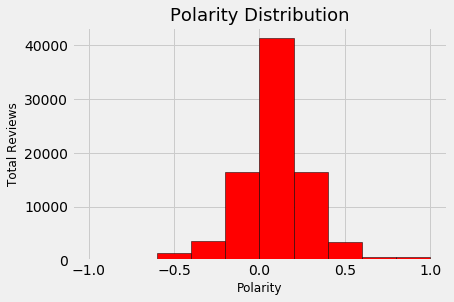

In [20]:
#Ploting the Polarity Distribution For User Reviews.
plt.hist(finalreview_data['Polarity'],edgecolor = 'black',color = 'red')
plt.title('Polarity Distribution',size=18)
plt.xlabel('Polarity',size = 12)
plt.ylabel('Total Reviews',size=12)

#The graph is normally distributed and symmetric.Which indicates that the top 1000 games reviews are more on the positive side. 

#### 2) Aspect Based Sentiment Analysis

In [21]:
#Reading the User Review CSV
reviews_df1=pd.read_csv('user_reviews_final_df.csv')

In [23]:
#Converting the reviews to string
reviews_df1['User_Review']=reviews_df1['User_Review'].apply(str)

In [26]:
#!pip install spacy
import spacy
from spacy import displacy
import en_core_web_sm

In [27]:
nlp = en_core_web_sm.load()

In [28]:
#Function to capture adj + noun  and noun + adj pairs 

def get_aspects(text):
    doc=nlp(text)
    noun_adj_pairs=[]
    #print([ (c, c.pos_) for c in doc])
    for i,token in enumerate(doc):

        
        #Extract noun and adjective pairs, where adjectives are after the noun.
        
        if token.pos_ in ('NOUN','PROPN'):
            if i <len(doc)-1 :
                adj=''
                
                for j in range(i+1,len(doc)):
                    
                    if doc[j].text in  ['no', 'not']:  
                        adj += 'not '
    
                    if doc[j].pos_   == 'ADJ':
                        adj += doc[j].text 
                        noun_adj_pairs.append((token.text,adj))
                        break
        
        #Extract noun and adjective pairs, where adjectives are before the nouns.
        
        if token.pos_ in ('ADJ'):
            if i <len(doc) -1:
                if doc[i+1].pos_ in ('NOUN'):
                    noun_adj_pairs.append((doc[i+1].text, token.text))
                    break

    return noun_adj_pairs

In [29]:
#Applying the get_aspects function to determine aspects within the user reviews.
reviews_df1['Aspects']= reviews_df1['User_Review'].apply(get_aspects)

In [30]:
#Printing the dataframe
reviews_df1

Unnamed: 0                                          Game_Name  \
0               0               The Legend of Zelda: Ocarina of Time   
1               1               The Legend of Zelda: Ocarina of Time   
2               2               The Legend of Zelda: Ocarina of Time   
3               3               The Legend of Zelda: Ocarina of Time   
4               4               The Legend of Zelda: Ocarina of Time   
...           ...                                                ...   
83986       83986  Monkey Island 2 Special Edition: LeChuck's Rev...   
83987       83987  Monkey Island 2 Special Edition: LeChuck's Rev...   
83988       83988  Monkey Island 2 Special Edition: LeChuck's Rev...   
83989       83989  Monkey Island 2 Special Edition: LeChuck's Rev...   
83990       83990  Monkey Island 2 Special Edition: LeChuck's Rev...   

          Platform Review_Date  \
0      Nintendo 64   25-Apr-11   
1      Nintendo 64    9-Jun-11   
2      Nintendo 64   25-Nov-10   
3      Nintendo 64   12-Jun-11   
4      Nintendo 64   21-Mar-10   
...            ...         ...   
83986           PC    2-Jun-19   
83987           PC   18-Mar-17   
83988           PC   18-Oct-19   
83989           PC    6-Sep-20   
83990           PC    1-May-20   

                                             User_Review  User_Rating  \
0      I won't bore you with what everyone is already...           10   
1      I'm one of those people who think that this is...           10   
2      Anyone who gives the masterpiece below a 7 or ...           10   
3      Everything in OoT is so near at perfection, it...           10   
4      This game is the highest rated game on Metacri...           10   
...                                                  ...          ...   
83986  I am one of the players who never played the o...            9   
83987  If I had played this game 25 years ago, I'm su...            7   
83988  This game is pretty fun. Good times were had b...            8   
83989  Вторая часть оказалось чуть лучше первой, а им...            4   
83990  And here is the best point and click graphic a...            9   

                                                 Aspects  
0                                                     []  
1                 [(people, greatest), (game, greatest)]  
2      [(masterpiece, astounding), (zelda, good), (fr...  
3      [(OoT, not huge), (perfection, not huge), (won...  
4      [(game, highest), (game, good), (Metacritic, g...  
...                                                  ...  
83986  [(players, original), (adventure, not good), (...  
83987  [(game, sure), (years, sure), (remake, good), ...  
83988                       [(game, fun), (times, Good)]  
83989  [(Вторая, это), (часть, это), (оказалось, это)...  
83990                                    [(point, best)]  

[83991 rows x 7 columns]

In [33]:
#Getting all the ascpects in the form of Noun & Adjective
all_aspects=[]
from collections import defaultdict

all_aspects=defaultdict(list)

for i, aspect_review in reviews_df1['Aspects'].iteritems():
    for aspect in aspect_review:
        all_aspects[aspect[0]].append(aspect[1])

In [36]:
#Priting all the aspects
all_aspects

defaultdict(list,
            {'people': ['greatest',
              'younger',
              'unbeatable',
              'childish',
              'bad',
              'not common',
              'creative',
              'cool',
              'low',
              'worst',
              'crap',
              'many',
              'awful',
              'boring',
              'dead',
              'not old',
              'silly',
              'creative',
              'creative',
              'creative',
              'creative',
              'low',
              'awful',
              'perfect',
              'enough',
              'unknown',
              'not disappointing',
              'such',
              'good',
              'not mindless',
              'best',
              'only',
              'only',
              'not scenic',
              'many',
              'wrong',
              'special',
              'mad',
              'many',
              'Possible',
 

In [ ]:
#Getting the count of aspects 
aspect_count=[]
for aspect, sentiment in all_aspects.items():
    aspect_count.append((aspect, len(sentiment)))
aspect_count.sort(key=lambda x: x[1], reverse=True)

In [38]:
#Printing thee aspect count.
aspect_count

[('game', 50391),
 ('games', 7753),
 ('story', 4202),
 ('graphics', 3761),
 ('de', 3665),
 ('que', 3436),
 ('time', 3339),
 ('gameplay', 2895),
 ('review', 2779),
 ('y', 2294),
 ('la', 2121),
 ('people', 1975),
 ('hours', 1847),
 ('el', 1714),
 ('spoilers', 1659),
 ('lot', 1567),
 ('un', 1547),
 ('series', 1538),
 ('Mario', 1486),
 ('fan', 1477),
 ('years', 1475),
 ('way', 1470),
 ('fun', 1469),
 ('juego', 1407),
 ('es', 1354),
 ('world', 1349),
 ('Game', 1279),
 ('characters', 1257),
 ('player', 1256),
 ('RPG', 1219),
 ('experience', 1211),
 ('masterpiece', 1208),
 ('los', 1115),
 ('version', 1090),
 ('thing', 1082),
 ('one', 1069),
 ('things', 953),
 ('reviews', 940),
 ('combat', 917),
 ('bit', 916),
 ('PC', 911),
 ('year', 907),
 ('una', 905),
 ('multiplayer', 876),
 ('controls', 861),
 ('music', 828),
 ('action', 825),
 ('level', 823),
 ('Souls', 813),
 ('FPS', 807),
 ('play', 802),
 ('times', 791),
 ('para', 781),
 ('con', 777),
 ('video', 734),
 ('e', 731),
 ('GTA', 702),
 ('lo',

#### #Determining polarity of the top Aspects

In [40]:
TextBlob(' '.join(all_aspects['game'])).sentiment

Sentiment(polarity=0.37146352004018884, subjectivity=0.619764201560256)

In [41]:
TextBlob(' '.join(all_aspects['graphics'])).sentiment

Sentiment(polarity=0.46614632729363037, subjectivity=0.6977040896873068)

In [42]:
TextBlob(' '.join(all_aspects['story'])).sentiment

Sentiment(polarity=0.3319266960993134, subjectivity=0.6266223183048594)

In [43]:
TextBlob(' '.join(all_aspects['gameplay'])).sentiment

Sentiment(polarity=0.29555109182200995, subjectivity=0.6020278941013641)

In [44]:
TextBlob(' '.join(all_aspects['hours'])).sentiment

Sentiment(polarity=0.178353868864919, subjectivity=0.5271118892021301)

In [45]:
TextBlob(' '.join(all_aspects['spoilers'])).sentiment

Sentiment(polarity=0.3146572781897718, subjectivity=0.5987916246474474)

###  $$WORD ~~ CLOUD$$

In [376]:
#Retrieving the reviews with polarity greater than 0(i.e Positive Reviews)
positive_reviews= finalreview_data[['Game_Name','Platform','Review_Date','User_Rating','clean_review', 'Polarity','Subjectivity']] [finalreview_data.Polarity>0]

In [377]:
#Printing the Positive Reviews
positive_reviews

Game_Name     Platform  \
0                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
1                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
2                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
3                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
5                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
...                                                  ...          ...   
83985  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
83986  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
83987  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
83988  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
83990  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   

      Review_Date  User_Rating  \
0       25-Apr-11           10   
1        9-Jun-11           10   
2       25-Nov-10           10   
3       12-Jun-11           10   
5       28-Jun-12           10   
...           ...          ...   
83985   16-Feb-16           10   
83986    2-Jun-19            9   
83987   18-Mar-17            7   
83988   18-Oct-19            8   
83990    1-May-20            9   

                                            clean_review  Polarity  \
0      bore everyone already saying amazing game fenc...      0.12   
1      one people think greatest game time matter qua...      0.02   
2      anyone give masterpiece 7 8 either hate astoun...      0.13   
3      everything oot near perfection really wonder g...      0.09   
5      highest scoring game metacritic every review s...      0.17   
...                                                  ...       ...   
83985  brilliant offbeat humourous adventure game jok...      0.03   
83986  one player never played original started adven...      0.18   
83987  played game 25 year ago sure would enjoyed rem...      0.14   
83988  game pretty fun good time best monkey time fun...      0.30   
83990  best point click graphic adventure ever played...      0.50   

       Subjectivity  
0              0.49  
1              0.46  
2              0.61  
3              0.49  
5              0.60  
...             ...  
83985          0.40  
83986          0.53  
83987          0.51  
83988          0.39  
83990          0.52  

[56609 rows x 7 columns]

In [379]:
#Importing the required 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [388]:
#Printing the length of the words in the user reviews.
text = " ".join(review for review in positive_reviews.clean_review )
print ("There are {} words in the combination of all review.".format(len(text)))

There are 27259372 words in the combination of all review.


In [381]:
#Initialize the Stopwords
stopwords = set(STOPWORDS)

In [382]:
#Updating the stopword list
stopwords.update(['game', 'S', 're', 'Wa', 'wa', 'doesn', 'go', 'make', 'ii', 'isn','le', 'haven', 't', 'don','re', 'games', 'ha'])

In [383]:
#Converting the image to array
mask = np.array(Image.open("cont4.png"))

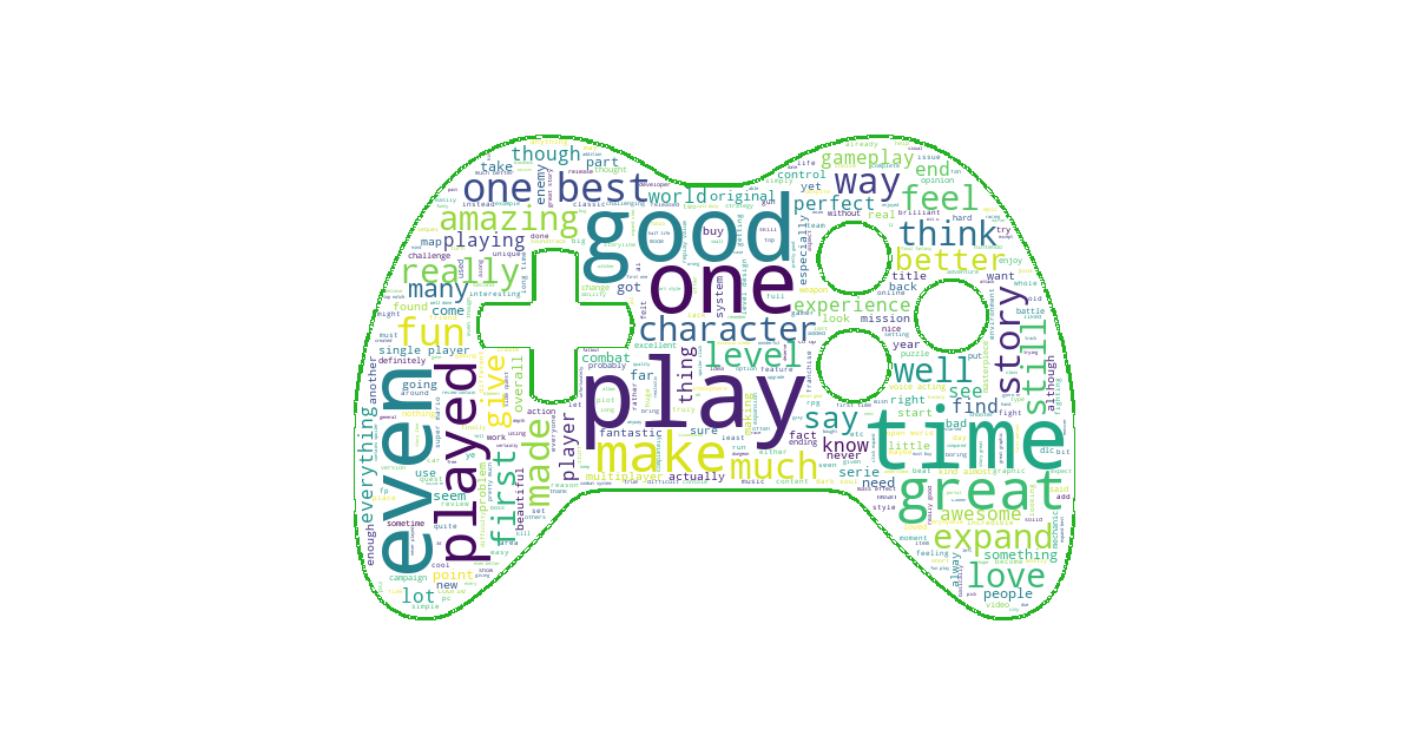

In [435]:
#Creating the word cloud for positive reviews.
wc = WordCloud(background_color='white', mask=mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1,stopwords=stopwords, contour_color='#22b222')
wc.generate(text)
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.savefig('positive.png')

In [386]:
#Retrieving the reviews with polarity less than 0(i.e Negative Reviews)
negative_reviews= finalreview_data[['Game_Name','Platform','Review_Date','User_Rating','clean_review', 'Polarity','Subjectivity']] [finalreview_data.Polarity<0]

In [387]:
#Printing the Negative Reviews
negative_reviews

Game_Name     Platform  \
4                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
8                   The Legend of Zelda: Ocarina of Time  Nintendo 64   
17                  The Legend of Zelda: Ocarina of Time  Nintendo 64   
18                  The Legend of Zelda: Ocarina of Time  Nintendo 64   
19                  The Legend of Zelda: Ocarina of Time  Nintendo 64   
...                                                  ...          ...   
83960                     Diablo II: Lord of Destruction           PC   
83961                     Diablo II: Lord of Destruction           PC   
83978  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
83979  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   
83980  Monkey Island 2 Special Edition: LeChuck's Rev...           PC   

      Review_Date  User_Rating  \
4       21-Mar-10           10   
8       29-Aug-12           10   
17       3-Jan-10           10   
18      23-Jun-11           10   
19      30-May-13           10   
...           ...          ...   
83960    3-Dec-19           10   
83961    3-Nov-19           10   
83978   27-Mar-16            5   
83979   15-Jun-14            3   
83980   23-Oct-10            0   

                                            clean_review  Polarity  \
4      game highest rated game metacritic good reason...     -0.01   
8      say said nothing almost completely perfect gam...     -0.11   
17     game one best game ever created disappoints ma...     -0.14   
18     amazing game n64 trouble understanding negativ...     -0.12   
19     choose one game play lifetime contest landmark...     -0.10   
...                                                  ...       ...   
83960  time favorite addictive game ever game made pl...     -0.08   
83961      game passed test time worth returning 18 year     -0.05   
83978  follows illogical puzzle line first monkey isl...     -0.19   
83979  loved secret monkey island remake played first...     -0.03   
83980  worst game played childish full lame task humo...     -0.13   

       Subjectivity  
4              0.43  
8              0.67  
17             0.44  
18             0.42  
19             0.40  
...             ...  
83960          0.68  
83961          0.25  
83978          0.53  
83979          0.39  
83980          0.60  

[21685 rows x 7 columns]

In [392]:
#Printing the length of the words in the user reviews.
text1 = " ".join(review for review in negative_reviews.clean_review )
print ("There are {} words in the combination of all review.".format(len(text1)))

There are 11378797 words in the combination of all review.


In [412]:
#Initialize the Stopwords
stopwords1 = set(STOPWORDS)

In [421]:
#Updating the stopword list
stopwords1.update(['amazing','good','game', 'best','play', 'playing','played','charater','great', 'go', 'one', 'ne', 'fun', 'even', 'really', 'got', 'S', 're', 'wa', 'doesn', 'go',' ii', 'isn','le', 'haven', 't', 'don','re', 'games','gameplay', 'game','ha'])

In [397]:
#Converting the image to array
mask1 = np.array(Image.open("cont4.png"))

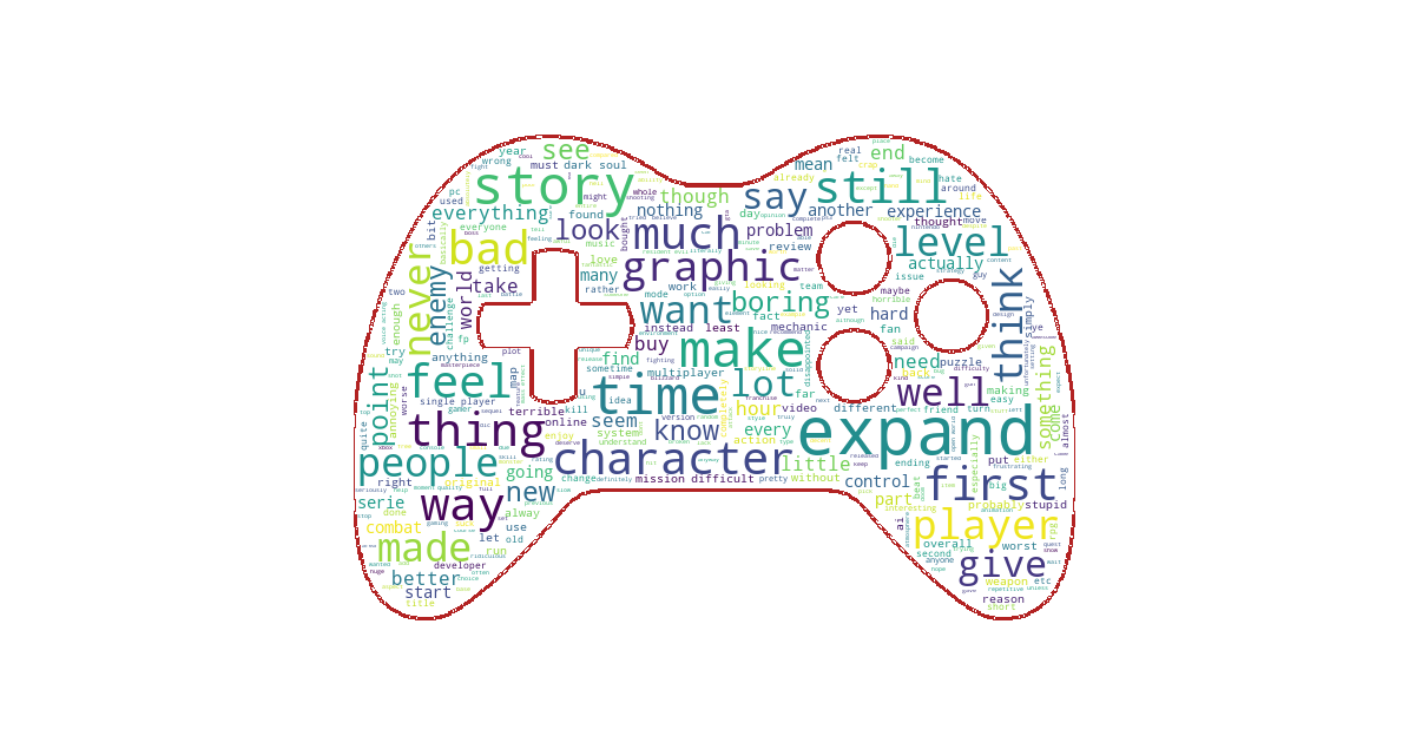

In [436]:
#Creating the word cloud for positive reviews.
wc1 = WordCloud(background_color='white', mask=mask1, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1,stopwords=stopwords1, contour_color='firebrick')
wc1.generate(text1)
plt.figure(figsize=(20, 20))
plt.imshow(wc1, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.savefig('negative.png')

In [46]:
#Intializing 1 i.e (Positive Reviews) for polarity greater than 0 & 0(Negative Reviews) for polarity less than 0.
import numpy as np

conditions = [
    (finalreview_data['Polarity'] < 0),
    (finalreview_data['Polarity'] > 0),
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
finalreview_data['Reviews_Sentiment'] = np.select(conditions, values)

#Display updated DataFrame
finalreview_data

Unnamed: 0                                          Game_Name  \
0               0               The Legend of Zelda: Ocarina of Time   
1               1               The Legend of Zelda: Ocarina of Time   
2               2               The Legend of Zelda: Ocarina of Time   
3               3               The Legend of Zelda: Ocarina of Time   
4               4               The Legend of Zelda: Ocarina of Time   
...           ...                                                ...   
83986       83986  Monkey Island 2 Special Edition: LeChuck's Rev...   
83987       83987  Monkey Island 2 Special Edition: LeChuck's Rev...   
83988       83988  Monkey Island 2 Special Edition: LeChuck's Rev...   
83989       83989  Monkey Island 2 Special Edition: LeChuck's Rev...   
83990       83990  Monkey Island 2 Special Edition: LeChuck's Rev...   

          Platform Review_Date  \
0      Nintendo 64   25-Apr-11   
1      Nintendo 64    9-Jun-11   
2      Nintendo 64   25-Nov-10   
3      Nintendo 64   12-Jun-11   
4      Nintendo 64   21-Mar-10   
...            ...         ...   
83986           PC    2-Jun-19   
83987           PC   18-Mar-17   
83988           PC   18-Oct-19   
83989           PC    6-Sep-20   
83990           PC    1-May-20   

                                             User_Review  User_Rating  \
0      I won't bore you with what everyone is already...           10   
1      I'm one of those people who think that this is...           10   
2      Anyone who gives the masterpiece below a 7 or ...           10   
3      Everything in OoT is so near at perfection, it...           10   
4      This game is the highest rated game on Metacri...           10   
...                                                  ...          ...   
83986  I am one of the players who never played the o...            9   
83987  If I had played this game 25 years ago, I'm su...            7   
83988  This game is pretty fun. Good times were had b...            8   
83989  Вторая часть оказалось чуть лучше первой, а им...            4   
83990  And here is the best point and click graphic a...            9   

                                            Clean_review  \
0      bore everyone already saying amazing game fenc...   
1      one people think greatest game time matter qua...   
2      anyone give masterpiece 7 8 either hate astoun...   
3      everything oot near perfection really wonder g...   
4      game highest rated game metacritic good reason...   
...                                                  ...   
83986  one player never played original started adven...   
83987  played game 25 year ago sure would enjoyed rem...   
83988  game pretty fun good time best monkey time fun...   
83989  вторая часть оказалось чуть лучше первой а име...   
83990  best point click graphic adventure ever played...   

                                        Sentiment  Polarity  Subjectivity  \
0      (0.12222222222222223, 0.48888888888888893)      0.12          0.49   
1      (0.024100776674306094, 0.4598118792971733)      0.02          0.46   
2        (0.1302631578947368, 0.6052631578947366)      0.13          0.61   
3                    (0.09200000000000001, 0.488)      0.09          0.49   
4      (-0.0090909090909091, 0.42727272727272736)     -0.01          0.43   
...                                           ...       ...           ...   
83986   (0.18045977011494252, 0.5270114942528736)      0.18          0.53   
83987   (0.13653846153846155, 0.5126068376068378)      0.14          0.51   
83988  (0.29999999999999993, 0.38571428571428573)      0.30          0.39   
83989                                  (0.0, 0.0)      0.00          0.00   
83990    (0.5033333333333333, 0.5166666666666666)      0.50          0.52   

      Reviews_Sentiment  
0                     1  
1                     1  
2                     1  
3                     1  
4                     0  
...                 ...  
83986                 1  
83

In [47]:
finalreview_data.to_csv("review_sentiment1.csv")

## $$ THANK ~~ YOU!!$$ 